# OpenAI FrozenLake task

# Reference: https://gym.openai.com/envs/FrozenLake-v0/
    
Winter is here. You and your friends were tossing around a frisbee at the park
when you made a wild throw that left the frisbee out in the middle of the lake.
The water is mostly frozen, but there are a few holes where the ice has melted.
If you step into one of those holes, you'll fall into the freezing water.
At this time, there's an international frisbee shortage, so it's absolutely imperative that
you navigate across the lake and retrieve the disc.

However, the ice is slippery, so you won't always move in the direction you intend

The surface is described using a grid like the following
    SFFF
    FHFH
    FFFH
    HFFG
S : starting point, safe
F : frozen surface, safe
H : hole, fall to your doom
G : goal, where the frisbee is located

The episode ends when you reach the goal or fall in a hole.

You receive a reward of 1 if you reach the goal, and zero otherwise.    

# Part 0: Explore the Env

In [1]:
import gym
env = gym.make('FrozenLake-v0')

In [2]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(16)


In [28]:
import numpy as np
import sys
import math
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
def q_learning(env, agent, num_episodes):
    # monitoring
    plot_every = 100
    tmp_scores = deque(maxlen=plot_every)
    scores = deque(maxlen=num_episodes)
    epsilon = 1.0
    best_avg_reward = -math.inf
    # loop over episodes
    for i_episode in range(1, num_episodes+1):
        # monitor progress
        if i_episode % 100 == 0:
            print("\rEpisode {}/{}".format(i_episode, num_episodes), end="")
            sys.stdout.flush()
        
        epsilon = 1.0/i_episode
        score = 0.0
        state = env.reset()
        while True:
            action = agent.select_action(state, epsilon)
            next_state, reward, done, info = env.step(action)
            if done and reward==0.0:
                reward = -1.0
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                score = np.max([0.0, score])
                tmp_scores.append(score)
                scores.append(score)
                break
                
        if (i_episode >= 100):
            if (np.mean(tmp_scores) > best_avg_reward):
                best_avg_reward = np.mean(tmp_scores)    

        print("\rEpisode {}/{} || Best average reward {}".format(i_episode, num_episodes, best_avg_reward), end="")
        sys.stdout.flush()

        # check if task is solved (according to OpenAI Gym)
        if best_avg_reward >= 0.78:
            print('\nEnvironment solved in {} episodes.'.format(i_episode), end="")
            break
    
    return scores

Episode 337/20000 || Best average reward 0.78
Environment solved in 337 episodes.

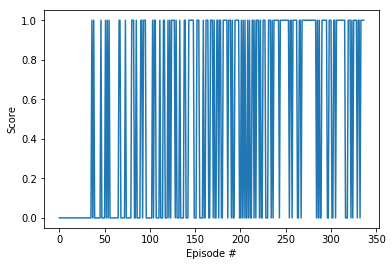

In [74]:
from agent import Agent

agent = Agent(4, 0.1, 0.99)
scores = q_learning(env, agent, 20000)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()